# Vancouver Transit Exploration Task
## CMPT 353 Final Project
### Jason Cai, Rebekah Wong (Group: "Mute Jammers")

In [1]:
# Geopandas: same as pandas, but better suited for geographic data (i.e. 'geometry' column to plot out map of Vancouver)
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

## Introduction: looking at transit data as is

In [2]:
# Read transit data from directory
# https://doi.org/10.25314/5e94d820-678e-4d3a-9a97-51fb730d5cf5
transit = gpd.read_file('data/transit.zip')

transit

,id,geo_uid,csdname,csdtype,policy_yea,transit_qu,geometry
0,161755,59150307,Vancouver,CY,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1,161756,59150308,Vancouver,CY,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
2,161757,59150309,Vancouver,CY,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
3,161758,59150310,Vancouver,CY,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
4,161759,59150311,Vancouver,CY,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...,...,...
7931,169686,59153996,Vancouver,CY,2040,2788.322613,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
7932,169687,59153997,Vancouver,CY,2040,2441.398929,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
7933,169688,59154000,Vancouver,CY,2040,1559.674322,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
7934,169689,59154001,Vancouver,CY,2040,3214.729398,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


In [3]:
# Rename columns for clarity
transit = transit.rename(columns={'csdname':'city', 'policy_yea':'year', 'transit_qu':'transit_quality'})

# Only keep necessary columns for analysis
# geo_uid: unique identifier for region (inferred because items with same geo_uid have same geometry/shape)
transit = transit[['geo_uid', 'city', 'year', 'transit_quality', 'geometry']]

# Need to use "|" instead of Python "or" to prevent ambiguity error - https://stackoverflow.com/q/36921951
transit = transit[(transit['year'] == 2010) | (transit['year'] == 2015) | (transit['year'] == 2020)]

transit

,geo_uid,city,year,transit_quality,geometry
0,59150307,Vancouver,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5..."
1,59150308,Vancouver,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5..."
2,59150309,Vancouver,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5..."
3,59150310,Vancouver,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5..."
4,59150311,Vancouver,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5..."
...,...,...,...,...,...
5947,59153996,Vancouver,2020,1795.115966,"POLYGON ((491123.035 5459615.245, 491120.710 5..."
5948,59153997,Vancouver,2020,1819.825217,"POLYGON ((491676.840 5459587.193, 491605.386 5..."
5949,59154000,Vancouver,2020,1001.975525,"POLYGON ((492570.830 5458268.003, 492570.838 5..."
5950,59154001,Vancouver,2020,2782.914647,"POLYGON ((492175.437 5458706.854, 492275.116 5..."


<AxesSubplot:>

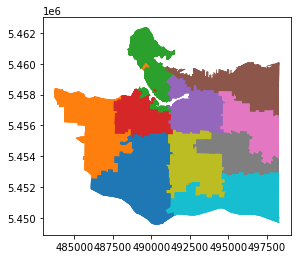

In [4]:
# Plot map of Vancouver based on geometry shapes in data
transit.plot(column='geometry')

<AxesSubplot:>

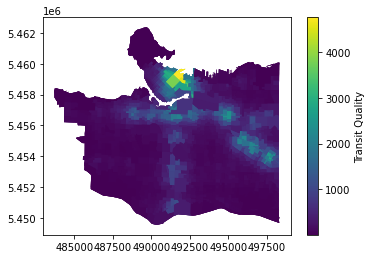

In [5]:
# Transit quality needs cleaning! Graph does not look very informative as is :(
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
transit.plot(column='transit_quality', legend=True, legend_kwds={'label':'Transit Quality'})

In [6]:
# Preliminary work: Print data as is, prior to any cleaning/analysis
# Sort transit quality from highest score to lowest
transit.sort_values(by='transit_quality', ascending=False)

,geo_uid,city,year,transit_quality,geometry
5840,59153466,Vancouver,2020,4765.249599,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
2864,59153466,Vancouver,2020,4549.568024,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
5872,59153584,Vancouver,2020,4509.035780,"POLYGON ((492085.822 5459067.742, 492071.152 5..."
1872,59153466,Vancouver,2015,4457.191718,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
880,59153466,Vancouver,2010,4420.839584,"POLYGON ((492095.223 5459290.725, 492082.463 5..."
...,...,...,...,...,...
517,59150919,Vancouver,2010,1.160075,"POLYGON ((485911.931 5455587.268, 485910.903 5..."
5493,59150953,Vancouver,2020,0.693054,"POLYGON ((486989.341 5453053.085, 487006.918 5..."
2517,59150953,Vancouver,2020,0.568181,"POLYGON ((486989.341 5453053.085, 487006.918 5..."
1525,59150953,Vancouver,2015,0.551531,"POLYGON ((486989.341 5453053.085, 487006.918 5..."


In [7]:
transit['transit_quality'].min()

0.545307569824622

In [8]:
transit['transit_quality'].max()

4765.24959913149

In [9]:
transit['transit_quality'].mean()

446.5466410165331

In [10]:
transit['transit_quality'].median()

204.591990221745

(array([2789.,  590.,  312.,  157.,   67.,   33.,    7.,    5.,    3.,
           5.]),
 array([5.45307570e-01, 4.77015737e+02, 9.53486166e+02, 1.42995660e+03,
        1.90642702e+03, 2.38289745e+03, 2.85936788e+03, 3.33583831e+03,
        3.81230874e+03, 4.28877917e+03, 4.76524960e+03]),
 <BarContainer object of 10 artists>)

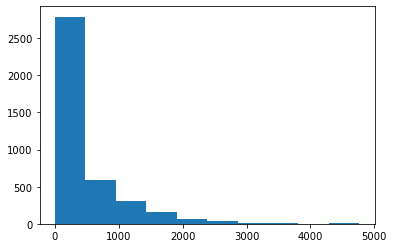

In [11]:
# Notice how the data is heavily right-skewed - fix by sqrt or log
plt.hist(transit['transit_quality'])

## Data Cleaning: Adding neighbourhood boundaries & population to geographical data

### Population

In [12]:
# Population information for each neighbourhood
# https://opendata.vancouver.ca/explore/dataset/census-local-area-profiles-2016/information/
census = gpd.read_file('data/CensusLocalAreaProfiles2016.csv')

census

,The data shown here is provided by Statistics Canada from the 2016 Census as a custom data order for the City of Vancouver using the City's 22 local planning areas,field_2,field_3,field_4,field_5,field_6,field_7,field_8,field_9,field_10,...,field_18,field_19,field_20,field_21,field_22,field_23,field_24,field_25,field_26,geometry
0,The data may be reproduced provided they are c...,,,,,,,,,,...,,,,,,,,,,None
1,,,,,,,,,,,...,,,,,,,,,,None
2,CENSUS DATA FOR CITY OF VANCOUVER LOCAL AREAS...,,,,,,,,,,...,,,,,,,,,,None
3,ID,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,...,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA,None
4,1,Total - Age groups and average age of the pop...,"15,295","62,030","21,425","33,620","29,175","34,575","49,325","13,975",...,"8,430","7,970","12,585","36,500","31,065","47,200","13,065","631,485","2,463,430",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588,5489,Non-Aboriginal,360,1300,335,505,305,750,1125,360,...,120,115,125,850,945,915,215,13300,46615,None
5589,5490,English and French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,15,None
5590,5491,English and non-official language,10,10,0,0,0,15,20,10,...,0,0,0,10,30,0,0,190,580,None
5591,5492,French and non-official language,0,15,10,20,10,0,20,0,...,15,10,0,0,15,20,10,265,685,None


In [13]:
census.iloc[3].values

array(['ID', 'Variable', 'Arbutus-Ridge ', 'Downtown ',
       'Dunbar-Southlands ', 'Fairview ', 'Grandview-Woodland ',
       'Hastings-Sunrise ', 'Kensington-Cedar Cottage ', 'Kerrisdale ',
       'Killarney ', 'Kitsilano ', 'Marpole ', 'Mount Pleasant ',
       'Oakridge ', 'Renfrew-Collingwood ', 'Riley Park ', 'Shaughnessy ',
       'South Cambie ', 'Strathcona ', 'Sunset ', 'Victoria-Fraserview',
       'West End ', 'West Point Grey ', 'Vancouver CSD ',
       'Vancouver CMA ', None], dtype=object)

In [14]:
census.iloc[4].values

array(['1',
       ' Total - Age groups and average age of the population - 100% data ',
       '15,295', '62,030', '21,425', '33,620', '29,175', '34,575',
       '49,325', '13,975', '29,325', '43,045', '24,460', '32,955',
       '13,030', '51,530', '22,555', '8,430', '7,970', '12,585', '36,500',
       '31,065', '47,200', '13,065', '631,485', '2,463,430', None],
      dtype=object)

In [15]:
# Create new dict to store relevant data above to create new dataframe
data = {'neighbourhood': census.iloc[3].values, 'population': census.iloc[4].values}

pop = pd.DataFrame(data=data)
pop

,neighbourhood,population
0,ID,1
1,Variable,Total - Age groups and average age of the pop...
2,Arbutus-Ridge,"15,295"
3,Downtown,"62,030"
4,Dunbar-Southlands,"21,425"
5,Fairview,"33,620"
6,Grandview-Woodland,"29,175"
7,Hastings-Sunrise,"34,575"
8,Kensington-Cedar Cottage,"49,325"
9,Kerrisdale,"13,975"


In [16]:
# Only keep relevant columns - neighbourhoods like 'ID' or 'variable' are not actual neighbourhoods
population = pop[2:-3]

# Reset index to start at 0 again (relevant to adding 'population' column to neighbourhood data later)
population = population.reset_index()[['neighbourhood', 'population']]

# Neighbourhoods have trailing space - need to filter out
population['neighbourhood'].values

array(['Arbutus-Ridge ', 'Downtown ', 'Dunbar-Southlands ', 'Fairview ',
       'Grandview-Woodland ', 'Hastings-Sunrise ',
       'Kensington-Cedar Cottage ', 'Kerrisdale ', 'Killarney ',
       'Kitsilano ', 'Marpole ', 'Mount Pleasant ', 'Oakridge ',
       'Renfrew-Collingwood ', 'Riley Park ', 'Shaughnessy ',
       'South Cambie ', 'Strathcona ', 'Sunset ', 'Victoria-Fraserview',
       'West End ', 'West Point Grey '], dtype=object)

In [17]:
# Strip spaces in dataframe column using str.strip()
# https://stackoverflow.com/a/43332157
population['neighbourhood'] = population['neighbourhood'].str.strip()

# Convert population to int instead of str; need to strip commas
# https://stackoverflow.com/a/16233599 for replace() method 
population['population'] = population['population'].str.replace(',', '').astype('int')

population

,neighbourhood,population
0,Arbutus-Ridge,15295
1,Downtown,62030
2,Dunbar-Southlands,21425
3,Fairview,33620
4,Grandview-Woodland,29175
5,Hastings-Sunrise,34575
6,Kensington-Cedar Cottage,49325
7,Kerrisdale,13975
8,Killarney,29325
9,Kitsilano,43045


In [18]:
population_dict = population.set_index('neighbourhood').to_dict()['population']

population_dict

{'Arbutus-Ridge': 15295,
 'Downtown': 62030,
 'Dunbar-Southlands': 21425,
 'Fairview': 33620,
 'Grandview-Woodland': 29175,
 'Hastings-Sunrise': 34575,
 'Kensington-Cedar Cottage': 49325,
 'Kerrisdale': 13975,
 'Killarney': 29325,
 'Kitsilano': 43045,
 'Marpole': 24460,
 'Mount Pleasant': 32955,
 'Oakridge': 13030,
 'Renfrew-Collingwood': 51530,
 'Riley Park': 22555,
 'Shaughnessy': 8430,
 'South Cambie': 7970,
 'Strathcona': 12585,
 'Sunset': 36500,
 'Victoria-Fraserview': 31065,
 'West End': 47200,
 'West Point Grey': 13065}

### Neighbourhood Boundaries

In [19]:
# Append neighbourhood information to transit data
# https://opendata.vancouver.ca/explore/dataset/local-area-boundary/information/
neighbourhood = gpd.read_file('data/local-area-boundary.zip')

neighbourhood

,name,geometry
0,Downtown,"POLYGON ((-123.11227 49.29016, -123.10424 49.2..."
1,Hastings-Sunrise,"POLYGON ((-123.05649 49.29349, -123.05190 49.2..."
2,Kerrisdale,"POLYGON ((-123.17908 49.21556, -123.17870 49.2..."
3,Marpole,"POLYGON ((-123.10696 49.20416, -123.11153 49.2..."
4,Oakridge,"POLYGON ((-123.10562 49.23312, -123.10616 49.2..."
5,Riley Park,"POLYGON ((-123.10562 49.23312, -123.11617 49.2..."
6,South Cambie,"POLYGON ((-123.11599 49.23794, -123.11617 49.2..."
7,Shaughnessy,"POLYGON ((-123.15527 49.23452, -123.15508 49.2..."
8,Victoria-Fraserview,"POLYGON ((-123.05683 49.20420, -123.05846 49.2..."
9,Arbutus Ridge,"POLYGON ((-123.15260 49.25723, -123.15276 49.2..."


In [20]:
# Rename column for clarity
neighbourhood = neighbourhood.rename(columns={'name':'neighbourhood'})

# Sort alphabetically
neighbourhood = neighbourhood.sort_values(by='neighbourhood').reset_index()

# Add population column to neighbourhood list
neighbourhood['population'] = population['population']

# Keep relevant columns
neighbourhood = neighbourhood[['neighbourhood', 'geometry', 'population']]

neighbourhood

,neighbourhood,geometry,population
0,Arbutus Ridge,"POLYGON ((-123.15260 49.25723, -123.15276 49.2...",15295
1,Downtown,"POLYGON ((-123.11227 49.29016, -123.10424 49.2...",62030
2,Dunbar-Southlands,"POLYGON ((-123.17017 49.24789, -123.17025 49.2...",21425
3,Fairview,"POLYGON ((-123.14599 49.25712, -123.14540 49.2...",33620
4,Grandview-Woodland,"POLYGON ((-123.07702 49.29025, -123.06778 49.2...",29175
5,Hastings-Sunrise,"POLYGON ((-123.05649 49.29349, -123.05190 49.2...",34575
6,Kensington-Cedar Cottage,"POLYGON ((-123.05659 49.26198, -123.05663 49.2...",49325
7,Kerrisdale,"POLYGON ((-123.17908 49.21556, -123.17870 49.2...",13975
8,Killarney,"POLYGON ((-123.02356 49.20015, -123.03998 49.2...",29325
9,Kitsilano,"POLYGON ((-123.13768 49.27532, -123.14375 49.2...",43045


<AxesSubplot:>

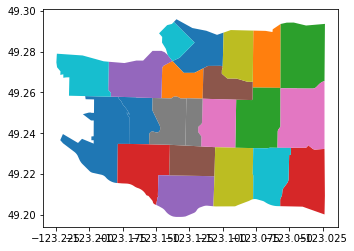

In [21]:
neighbourhood.plot(column='neighbourhood')

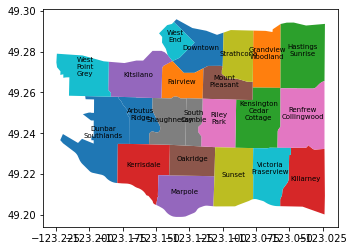

In [22]:
neighbourhoods = neighbourhood.plot(column='neighbourhood')

def str_reformat(string):
    string = string.replace("-", "\n")
    string = string.replace(" ", "\n")
    return string

# Add labels to map: https://stackoverflow.com/q/38899190
neighbourhood.apply(lambda x: neighbourhoods.annotate(text=str_reformat(x['neighbourhood']), xy=x.geometry.centroid.coords[0],
                                                      horizontalalignment='center', size=7), axis=1);

## Transit Data Cleaning: Modifying skewed data

In [23]:
# Square root all transit quality values
transit['sqrt'] = transit['transit_quality']**0.5

# Next possible fix: apply log to all transit quality values
transit['log'] = np.log(transit['transit_quality'])

transit

,geo_uid,city,year,transit_quality,geometry,sqrt,log
0,59150307,Vancouver,2010,6.232349,"POLYGON ((498310.190 5459815.920, 498309.638 5...",2.496467,1.829753
1,59150308,Vancouver,2010,86.331070,"POLYGON ((498303.642 5459212.268, 498303.155 5...",9.291451,4.458190
2,59150309,Vancouver,2010,125.565256,"POLYGON ((497940.841 5459213.445, 497940.812 5...",11.205590,4.832826
3,59150310,Vancouver,2010,246.654575,"POLYGON ((498298.679 5458709.775, 498298.646 5...",15.705240,5.507989
4,59150311,Vancouver,2010,150.230499,"POLYGON ((497939.463 5458606.665, 498128.359 5...",12.256855,5.012171
...,...,...,...,...,...,...,...
5947,59153996,Vancouver,2020,1795.115966,"POLYGON ((491123.035 5459615.245, 491120.710 5...",42.368809,7.492825
5948,59153997,Vancouver,2020,1819.825217,"POLYGON ((491676.840 5459587.193, 491605.386 5...",42.659409,7.506496
5949,59154000,Vancouver,2020,1001.975525,"POLYGON ((492570.830 5458268.003, 492570.838 5...",31.653997,6.909729
5950,59154001,Vancouver,2020,2782.914647,"POLYGON ((492175.437 5458706.854, 492275.116 5...",52.753338,7.931254


(array([ 580., 1420.,  732.,  458.,  391.,  224.,  109.,   38.,    8.,
           8.]),
 array([ 0.73844944,  7.56768323, 14.39691701, 21.2261508 , 28.05538459,
        34.88461838, 41.71385217, 48.54308596, 55.37231975, 62.20155354,
        69.03078733]),
 <BarContainer object of 10 artists>)

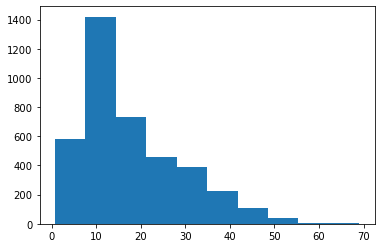

In [24]:
plt.hist(transit['sqrt'])

<AxesSubplot:>

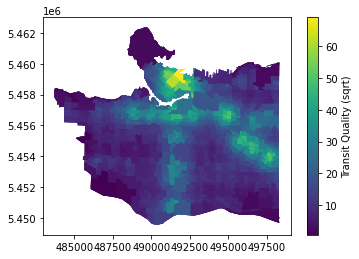

In [25]:
transit.plot(column='sqrt', legend=True, legend_kwds={'label':'Transit Quality (sqrt)'})

In [26]:
transit['sqrt'].min()

0.7384494362003549

In [27]:
transit['sqrt'].max()

69.0307873280574

In [28]:
transit['sqrt'].mean()

17.84035248958655

In [29]:
transit['sqrt'].median()

14.303564608856

(array([   7.,   13.,   26.,   86.,  335., 1027.,  900.,  781.,  677.,
         116.]),
 array([-0.6064053 ,  0.30114575,  1.2086968 ,  2.11624785,  3.0237989 ,
         3.93134995,  4.838901  ,  5.74645205,  6.6540031 ,  7.56155415,
         8.4691052 ]),
 <BarContainer object of 10 artists>)

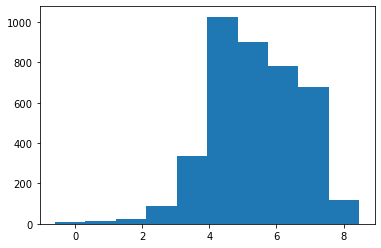

In [30]:
# Next possible fix: apply log to all transit quality values
plt.hist(transit['log'])

<AxesSubplot:>

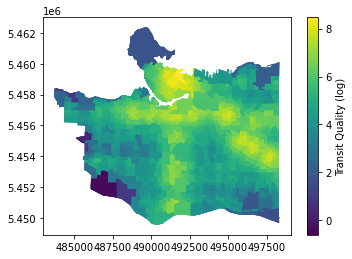

In [31]:
transit.plot(column='log', legend=True, legend_kwds={'label':'Transit Quality (log)'})

In [32]:
transit['log'].min()

-0.6064052952014497

In [33]:
transit['log'].max()

8.469105196485888

In [34]:
transit['log'].mean()

5.357822267444569

In [35]:
transit['log'].median()

5.32101741392108

## Final Scores: log(transit_quality) + 1

In [36]:
# Based on the min/max results above, we could further add 1 to each value so that the numbers fit neatly into a 0 to 10 range
transit['quality_score'] = transit['log'] + 1

In [37]:
# Keep relevant columns after scaling skewed data
transit = transit[['geo_uid', 'city', 'year', 'quality_score', 'geometry']]

In [38]:
transit['quality_score'].min()

0.3935947047985503

In [39]:
transit['quality_score'].max()

9.469105196485888

In [40]:
transit['quality_score'].mean()

6.357822267444574

In [41]:
transit['quality_score'].median()

6.32101741392108

## Aggregating to find average transit quality over time

In [42]:
# Determine which regions of Vancouver tend to score higher in transit quality
# Multiple entries per geo_uid represent different quality scores over years in data
transit_quality = transit.groupby('geo_uid').agg({'quality_score' : 'mean'}).sort_values(by='quality_score')

# Process dataframes more to leave only quality and area of Vancouver for comparisons
transit_quality = transit_quality.reset_index()

transit_quality

,geo_uid,quality_score
0,59150953,0.466644
1,59150919,1.215100
2,59150932,1.727413
3,59150983,1.839724
4,59150915,1.878309
...,...,...
987,59153168,8.968347
988,59153583,9.070947
989,59153845,9.194106
990,59153584,9.360151


In [43]:
# Extract dataframe with only list of geometry shapes to append to aggregated dataframe above
geometry = transit.drop_duplicates(subset='geometry')

# Match the geographic region back to its score based on geo_uid
transit_agg = geometry[['geo_uid', 'geometry']].merge(transit_quality, on='geo_uid')

transit_agg

,geo_uid,geometry,quality_score
0,59150307,"POLYGON ((498310.190 5459815.920, 498309.638 5...",2.856574
1,59150308,"POLYGON ((498303.642 5459212.268, 498303.155 5...",5.510685
2,59150309,"POLYGON ((497940.841 5459213.445, 497940.812 5...",5.891830
3,59150310,"POLYGON ((498298.679 5458709.775, 498298.646 5...",6.565582
4,59150311,"POLYGON ((497939.463 5458606.665, 498128.359 5...",6.069549
...,...,...,...
987,59153996,"POLYGON ((491123.035 5459615.245, 491120.710 5...",8.442239
988,59153997,"POLYGON ((491676.840 5459587.193, 491605.386 5...",8.459761
989,59154000,"POLYGON ((492570.830 5458268.003, 492570.838 5...",7.863696
990,59154001,"POLYGON ((492175.437 5458706.854, 492275.116 5...",8.882093


Text(0.5, 1.0, "Map of Vancouver's Transit Quality")

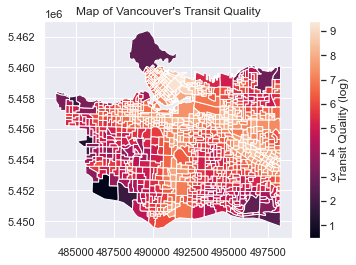

In [44]:
# Try graphing with seaborn for more detailed map
import seaborn
seaborn.set()

# Use 'set_title' function to add title to graph
# https://stackoverflow.com/q/75607179
transit_agg.plot(column='quality_score', legend=True, legend_kwds={'label':'Transit Quality (log)'}) \
            .set_title('Map of Vancouver\'s Transit Quality')

## Assigning geometry shapes to neighbourhoods

In [45]:
# Sorting by geometry values = shapes in same proximity more likely to be close by in dataframe
geometry_sort = transit_agg.sort_values(by='geometry')
geometry_sort

,geo_uid,geometry,quality_score
533,59150953,"POLYGON ((486989.341 5453053.085, 487006.918 5...",0.466644
534,59150954,"POLYGON ((487395.796 5453151.361, 487507.475 5...",3.878854
175,59150506,"POLYGON ((489554.260 5451473.837, 489552.232 5...",5.193598
567,59150987,"POLYGON ((488985.068 5451379.761, 488984.418 5...",4.610471
172,59150503,"POLYGON ((489763.972 5450647.543, 489763.104 5...",6.176278
...,...,...,...
696,59152942,"POLYGON ((498013.248 5450863.346, 498006.689 5...",3.489980
697,59152943,"POLYGON ((497543.208 5451431.111, 497574.071 5...",4.078259
586,59151219,"POLYGON ((496809.939 5451716.414, 496890.122 5...",2.659519
896,59153491,"POLYGON ((496921.982 5450444.672, 496852.341 5...",4.642653


In [46]:
geometry_sort['neighbourhood'] = 'None'
geometry_sort['population'] = 0

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1346967845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][0:2] = 'Dunbar-Southlands'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1346967845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][0:2] = population_dict['Dunbar-Southlands']


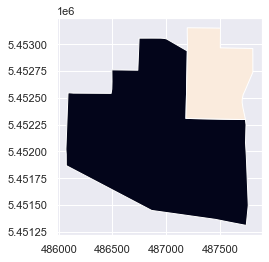

In [47]:
# parts of Dunbar Southlands
geometry_sort[0:2].plot(column='quality_score')
geometry_sort['neighbourhood'][0:2] = 'Dunbar-Southlands'
geometry_sort['population'][0:2] = population_dict['Dunbar-Southlands']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\498877129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][2:6] = 'Kerrisdale'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\498877129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][2:6] = population_dict['Kerrisdale']


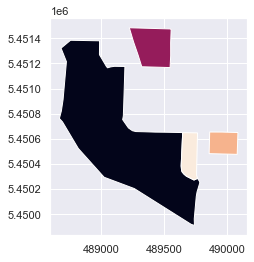

In [48]:
# parts of Kerrisdale
geometry_sort[2:6].plot(column='quality_score')
geometry_sort['neighbourhood'][2:6] = 'Kerrisdale'
geometry_sort['population'][2:6] = population_dict['Kerrisdale']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\728188567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][6:30] = 'Marpole'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\728188567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][6:30] = population_dict['Marpole']


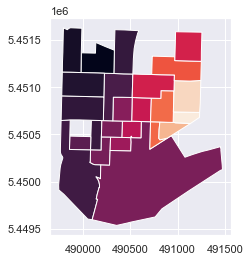

In [49]:
# parts of Marpole
geometry_sort[6:30].plot(column='quality_score')
geometry_sort['neighbourhood'][6:30] = 'Marpole'
geometry_sort['population'][6:30] = population_dict['Marpole']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3712089377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][30:69] = 'Kerrisdale'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3712089377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][30:69] = population_dict['Kerrisdale']


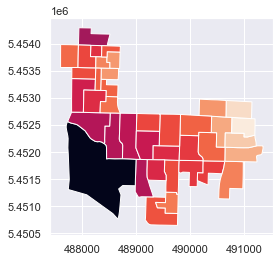

In [50]:
geometry_sort[30:69].plot(column='quality_score')
geometry_sort['neighbourhood'][30:69] = 'Kerrisdale'
geometry_sort['population'][30:69] = population_dict['Kerrisdale']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\733391395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][69:71] = 'Arbutus-Ridge'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\733391395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][69:71] = population_dict['Arbutus-Ridge']


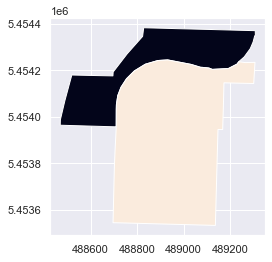

In [51]:
geometry_sort[69:71].plot(column='quality_score')
geometry_sort['neighbourhood'][69:71] = 'Arbutus-Ridge'
geometry_sort['population'][69:71] = population_dict['Arbutus-Ridge']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3596029941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][71:81] = 'Kerrisdale'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3596029941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][71:81] = population_dict['Kerrisdale']


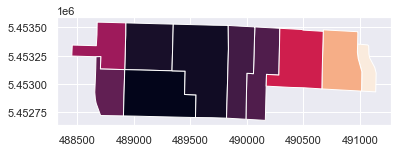

In [52]:
geometry_sort[71:81].plot(column='quality_score')
geometry_sort['neighbourhood'][71:81] = 'Kerrisdale'
geometry_sort['population'][71:81] = population_dict['Kerrisdale']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2909482459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][81:95] = 'Shaughnessy'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2909482459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][81:95] = population_dict['Shaughnessy']


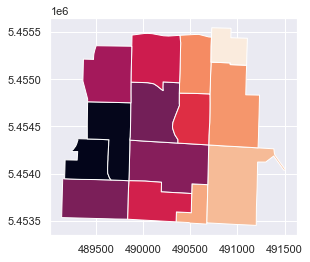

In [53]:
geometry_sort[81:95].plot(column='quality_score')
geometry_sort['neighbourhood'][81:95] = 'Shaughnessy'
geometry_sort['population'][81:95] = population_dict['Shaughnessy']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\752927849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][95:108] = 'Arbutus-Ridge'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\752927849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][95:108] = population_dict['Arbutus-Ridge']


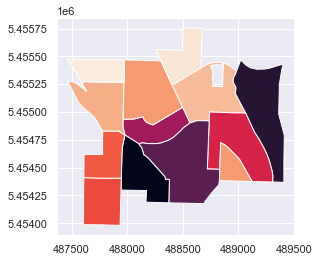

In [54]:
geometry_sort[95:108].plot(column='quality_score')
geometry_sort['neighbourhood'][95:108] = 'Arbutus-Ridge'
geometry_sort['population'][95:108] = population_dict['Arbutus-Ridge']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1947229105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][108:141] = 'Dunbar-Southlands'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1947229105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][108:141] = population_dict['Dunbar-Southlands']


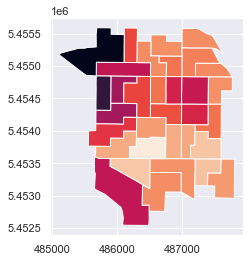

In [55]:
geometry_sort[108:141].plot(column='quality_score')
geometry_sort['neighbourhood'][108:141] = 'Dunbar-Southlands'
geometry_sort['population'][108:141] = population_dict['Dunbar-Southlands']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3089655890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][141:153] = 'West Point Grey'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3089655890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][141:153] = population_dict['West Point Grey']


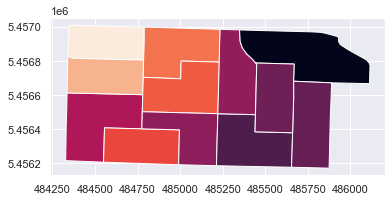

In [56]:
geometry_sort[141:153].plot(column='quality_score')
geometry_sort['neighbourhood'][141:153] = 'West Point Grey'
geometry_sort['population'][141:153] = population_dict['West Point Grey']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1119808391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][153:163] = 'Dunbar-Southlands'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1119808391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][153:163] = population_dict['Dunbar-Southlands']


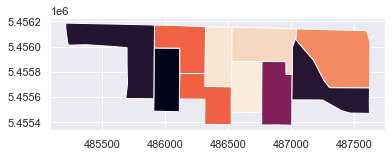

In [57]:
geometry_sort[153:163].plot(column='quality_score')
geometry_sort['neighbourhood'][153:163] = 'Dunbar-Southlands'
geometry_sort['population'][153:163] = population_dict['Dunbar-Southlands']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\126620624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][163:206] = 'West Point Grey'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\126620624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][163:206] = population_dict['West Point Grey']


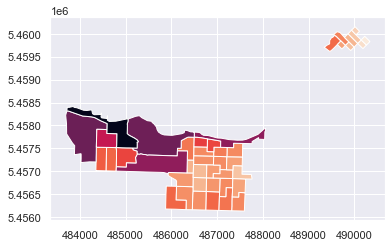

In [58]:
geometry_sort[163:206].plot(column='quality_score')
geometry_sort['neighbourhood'][163:206] = 'West Point Grey'
geometry_sort['population'][163:206] = population_dict['West Point Grey']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1629467321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][206:207] = 'Stanley Park'


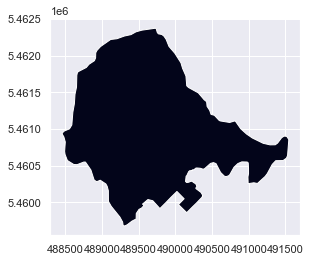

In [59]:
# Stanley Park - not recorded in neighbourhoods, but is still part of Vancouver
# (with limited transit, given that it's a huge park)
geometry_sort[206:207].plot(column='quality_score')
geometry_sort['neighbourhood'][206:207] = 'Stanley Park'

# No population listed as Stanley Park isn't a 'neighbourhood' - leave at 0

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\191518735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][207:259] = 'West End'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\191518735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][207:259] = population_dict['West End']


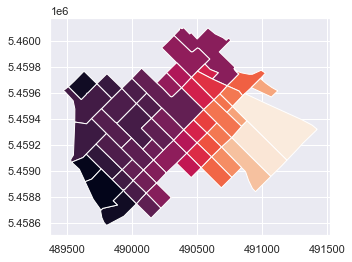

In [60]:
geometry_sort[207:259].plot(column='quality_score')
geometry_sort['neighbourhood'][207:259] = 'West End'
geometry_sort['population'][207:259] = population_dict['West End']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\787027282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][259:260] = 'Kitsilano'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\787027282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][259:260] = population_dict['Kitsilano']


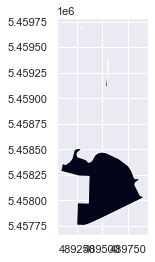

In [61]:
# Upper right of Kitsilano
geometry_sort[259:260].plot(column='quality_score')
geometry_sort['neighbourhood'][259:260] = 'Kitsilano'
geometry_sort['population'][259:260] = population_dict['Kitsilano']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1928515244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][260:292] = 'Downtown'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1928515244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][260:292] = population_dict['Downtown']


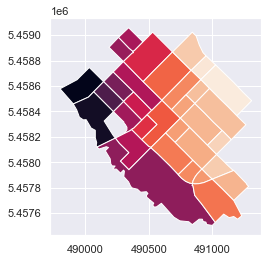

In [62]:
geometry_sort[260:292].plot(column='quality_score')
geometry_sort['neighbourhood'][260:292] = 'Downtown'
geometry_sort['population'][260:292] = population_dict['Downtown']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3089321212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][292:351] = 'Kitsilano'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3089321212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][292:351] = population_dict['Kitsilano']


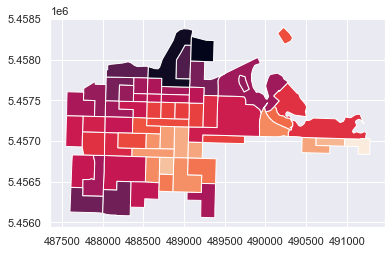

In [63]:
geometry_sort[292:351].plot(column='quality_score')
geometry_sort['neighbourhood'][292:351] = 'Kitsilano'
geometry_sort['population'][292:351] = population_dict['Kitsilano']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2274123556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][351:362] = 'Arbutus-Ridge'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2274123556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][351:362] = population_dict['Arbutus-Ridge']


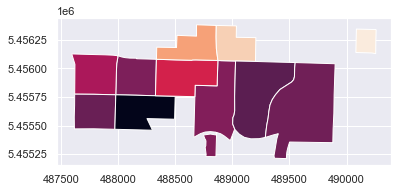

In [64]:
geometry_sort[351:362].plot(column='quality_score')
geometry_sort['neighbourhood'][351:362] = 'Arbutus-Ridge'
geometry_sort['population'][351:362] = population_dict['Arbutus-Ridge']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3399877745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][362:372] = 'Kitsilano'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3399877745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][362:372] = population_dict['Kitsilano']


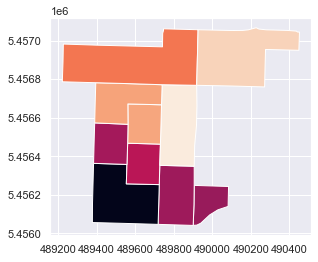

In [65]:
geometry_sort[362:372].plot(column='quality_score')
geometry_sort['neighbourhood'][362:372] = 'Kitsilano'
geometry_sort['population'][362:372] = population_dict['Kitsilano']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3498402781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][372:393] = 'Fairview'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3498402781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][372:393] = population_dict['Fairview']


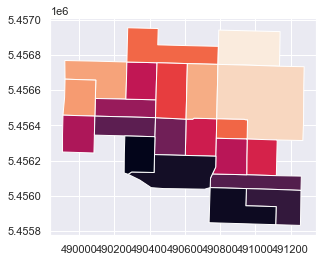

In [66]:
geometry_sort[372:393].plot(column='quality_score')
geometry_sort['neighbourhood'][372:393] = 'Fairview'
geometry_sort['population'][372:393] = population_dict['Fairview']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3248705710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][393:400] = 'Shaughnessy'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3248705710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][393:400] = population_dict['Shaughnessy']


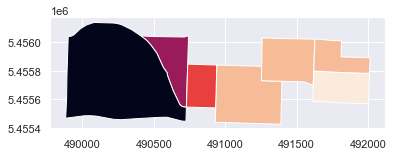

In [67]:
# bits of Shaughnessy
geometry_sort[393:400].plot(column='quality_score')
geometry_sort['neighbourhood'][393:400] = 'Shaughnessy'
geometry_sort['population'][393:400] = population_dict['Shaughnessy']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2049054797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][400:410] = 'Fairview'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2049054797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][400:410] = population_dict['Fairview']


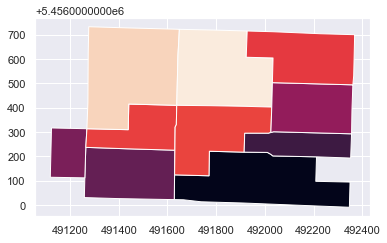

In [68]:
geometry_sort[400:410].plot(column='quality_score')
geometry_sort['neighbourhood'][400:410] = 'Fairview'
geometry_sort['population'][400:410] = population_dict['Fairview']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1243093240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][410:464] = 'Mount Pleasant'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1243093240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][410:464] = population_dict['Mount Pleasant']


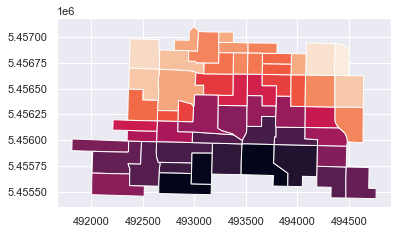

In [69]:
geometry_sort[410:464].plot(column='quality_score')
geometry_sort['neighbourhood'][410:464] = 'Mount Pleasant'
geometry_sort['population'][410:464] = population_dict['Mount Pleasant']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\954855751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][464:474] = 'Strathcona'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\954855751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][464:474] = population_dict['Strathcona']


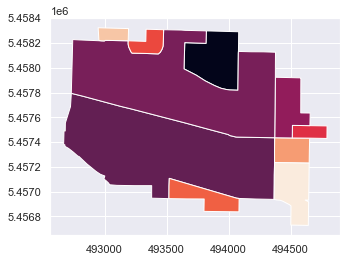

In [70]:
# part of Strathcona
geometry_sort[464:474].plot(column='quality_score')
geometry_sort['neighbourhood'][464:474] = 'Strathcona'
geometry_sort['population'][464:474] = population_dict['Strathcona']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3383202094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][474:477] = 'Downtown'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3383202094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][474:477] = population_dict['Downtown']


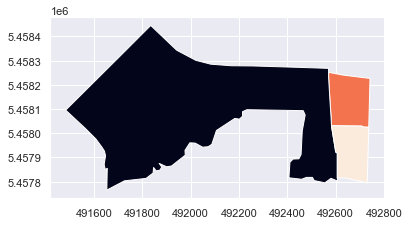

In [71]:
# more of Downtown
geometry_sort[474:477].plot(column='quality_score')
geometry_sort['neighbourhood'][474:477] = 'Downtown'
geometry_sort['population'][474:477] = population_dict['Downtown']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1298600485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][477:482] = 'Fairview'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1298600485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][477:482] = population_dict['Fairview']


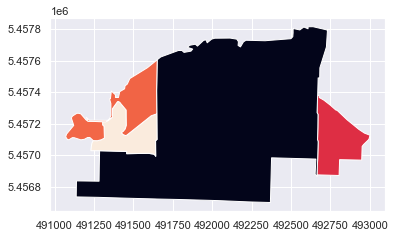

In [72]:
# more of Mount Pleasant
geometry_sort[477:482].plot(column='quality_score')
geometry_sort['neighbourhood'][477:482] = 'Fairview'
geometry_sort['population'][477:482] = population_dict['Fairview']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2976443394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][482:508] = 'Downtown'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2976443394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][482:508] = population_dict['Downtown']


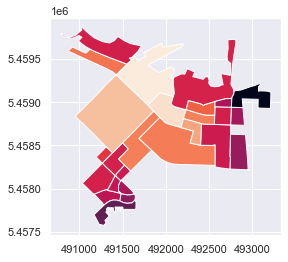

In [73]:
# more of Downtown
geometry_sort[482:508].plot(column='quality_score')
geometry_sort['neighbourhood'][482:508] = 'Downtown'
geometry_sort['population'][482:508] = population_dict['Downtown']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1250157874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][508:523] = 'Strathcona'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1250157874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][508:523] = population_dict['Strathcona']


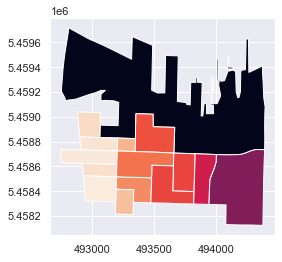

In [74]:
geometry_sort[508:523].plot(column='quality_score')
geometry_sort['neighbourhood'][508:523] = 'Strathcona'
geometry_sort['population'][508:523] = population_dict['Strathcona']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\4111108354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][523:553] = 'Grandview-Woodland'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\4111108354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][523:553] = population_dict['Grandview-Woodland']


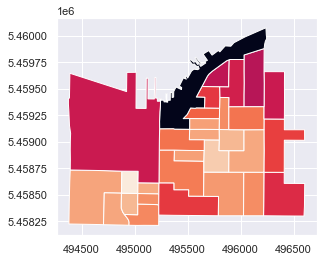

In [75]:
geometry_sort[523:553].plot(column='quality_score')
geometry_sort['neighbourhood'][523:553] = 'Grandview-Woodland'
geometry_sort['population'][523:553] = population_dict['Grandview-Woodland']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1921720424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][553:585] = 'Hastings-Sunrise'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1921720424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][553:585] = population_dict['Hastings-Sunrise']


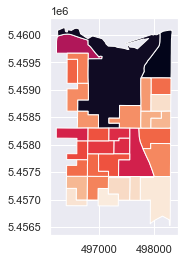

In [76]:
geometry_sort[553:585].plot(column='quality_score')
geometry_sort['neighbourhood'][553:585] = 'Hastings-Sunrise'
geometry_sort['population'][553:585] = population_dict['Hastings-Sunrise']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1517544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][585:619] = 'Grandview-Woodland'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1517544113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][585:619] = population_dict['Grandview-Woodland']


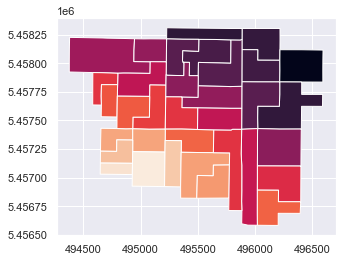

In [77]:
geometry_sort[585:619].plot(column='quality_score')
geometry_sort['neighbourhood'][585:619] = 'Grandview-Woodland'
geometry_sort['population'][585:619] = population_dict['Grandview-Woodland']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\4099152016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][619:645] = 'Kensington-Cedar Cottage'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\4099152016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][619:645] = population_dict['Kensington-Cedar Cottage']


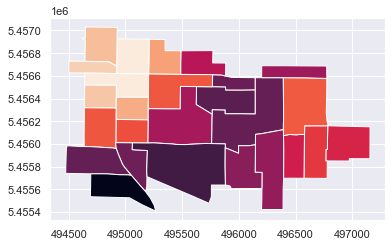

In [78]:
geometry_sort[619:645].plot(column='quality_score')
geometry_sort['neighbourhood'][619:645] = 'Kensington-Cedar Cottage'
geometry_sort['population'][619:645] = population_dict['Kensington-Cedar Cottage']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3263490903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][645:720] = 'Renfrew-Collingwood'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3263490903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][645:720] = population_dict['Renfrew-Collingwood']


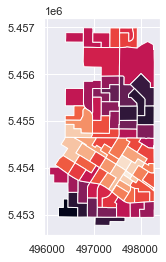

In [79]:
geometry_sort[645:720].plot(column='quality_score')
geometry_sort['neighbourhood'][645:720] = 'Renfrew-Collingwood'
geometry_sort['population'][645:720] = population_dict['Renfrew-Collingwood']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2834583193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][720:771] = 'Kensington-Cedar Cottage'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2834583193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][720:771] = population_dict['Kensington-Cedar Cottage']


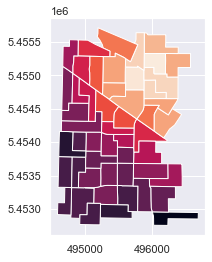

In [80]:
geometry_sort[720:771].plot(column='quality_score')
geometry_sort['neighbourhood'][720:771] = 'Kensington-Cedar Cottage'
geometry_sort['population'][720:771] = population_dict['Kensington-Cedar Cottage']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2067909450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][771:799] = 'Riley Park'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2067909450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][771:799] = population_dict['Riley Park']


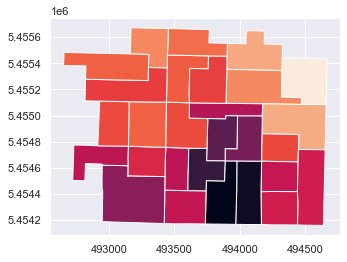

In [81]:
geometry_sort[771:799].plot(column='quality_score')
geometry_sort['neighbourhood'][771:799] = 'Riley Park'
geometry_sort['population'][771:799] = population_dict['Riley Park']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1287402453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][799:832] = 'South Cambie'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1287402453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][799:832] = population_dict['South Cambie']


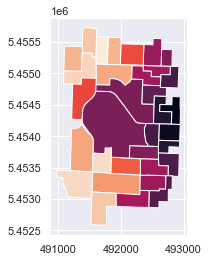

In [82]:
geometry_sort[799:832].plot(column='quality_score')
geometry_sort['neighbourhood'][799:832] = 'South Cambie'
geometry_sort['population'][799:832] = population_dict['South Cambie']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3180876043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][832:850] = 'Riley Park'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\3180876043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][832:850] = population_dict['Riley Park']


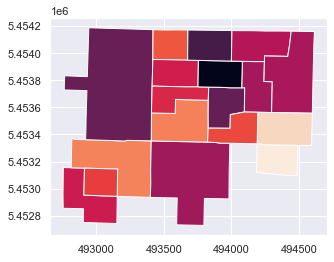

In [83]:
geometry_sort[832:850].plot(column='quality_score')
geometry_sort['neighbourhood'][832:850] = 'Riley Park'
geometry_sort['population'][832:850] = population_dict['Riley Park']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1965846678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][850:881] = 'Sunset'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1965846678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][850:881] = population_dict['Sunset']


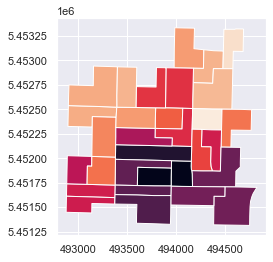

In [84]:
geometry_sort[850:881].plot(column='quality_score')
geometry_sort['neighbourhood'][850:881] = 'Sunset'
geometry_sort['population'][850:881] = population_dict['Sunset']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\4058307048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][881:900] = 'Oakridge'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\4058307048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][881:900] = population_dict['Oakridge']


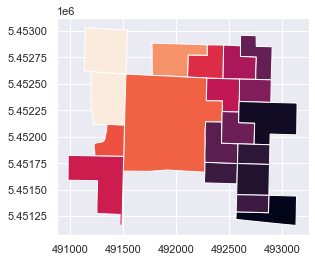

In [85]:
geometry_sort[881:900].plot(column='quality_score')
geometry_sort['neighbourhood'][881:900] = 'Oakridge'
geometry_sort['population'][881:900] = population_dict['Oakridge']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2638698567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][900:910] = 'Marpole'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2638698567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][900:910] = population_dict['Marpole']


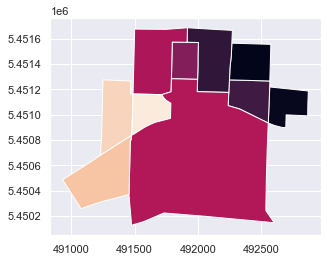

In [86]:
geometry_sort[900:910].plot(column='quality_score')
geometry_sort['neighbourhood'][900:910] = 'Marpole'
geometry_sort['population'][900:910] = population_dict['Marpole']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1120223239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][910:925] = 'Sunset'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1120223239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][910:925] = population_dict['Sunset']


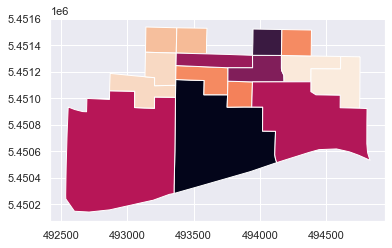

In [87]:
geometry_sort[910:925].plot(column='quality_score')
geometry_sort['neighbourhood'][910:925] = 'Sunset'
geometry_sort['population'][910:925] = population_dict['Sunset']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1572799410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][925:928] = 'Victoria-Fraserview'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\1572799410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][925:928] = population_dict['Victoria-Fraserview']


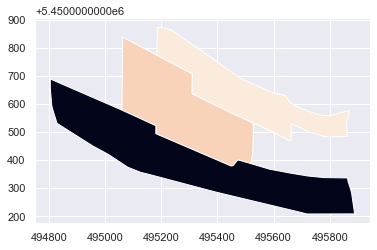

In [88]:
geometry_sort[925:928].plot(column='quality_score')
geometry_sort['neighbourhood'][925:928] = 'Victoria-Fraserview'
geometry_sort['population'][925:928] = population_dict['Victoria-Fraserview']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\984827682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][928:930] = 'Killarney'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\984827682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][928:930] = population_dict['Killarney']


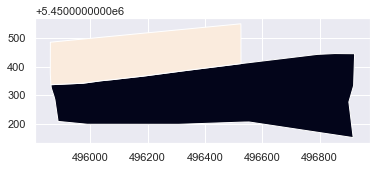

In [89]:
geometry_sort[928:930].plot(column='quality_score')
geometry_sort['neighbourhood'][928:930] = 'Killarney'
geometry_sort['population'][928:930] = population_dict['Killarney']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\823885594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][930:964] = 'Victoria-Fraserview'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\823885594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][930:964] = population_dict['Victoria-Fraserview']


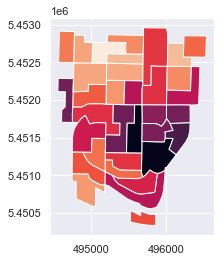

In [90]:
geometry_sort[930:964].plot(column='quality_score')
geometry_sort['neighbourhood'][930:964] = 'Victoria-Fraserview'
geometry_sort['population'][930:964] = population_dict['Victoria-Fraserview']

C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2904845625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['neighbourhood'][964:] = 'Killarney'
C:\Users\Rebekah\AppData\Local\Temp\ipykernel_57160\2904845625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geometry_sort['population'][964:] = population_dict['Killarney']


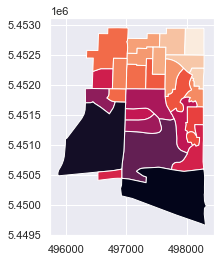

In [91]:
geometry_sort[964:].plot(column='quality_score')
geometry_sort['neighbourhood'][964:] = 'Killarney'
geometry_sort['population'][964:] = population_dict['Killarney']

<AxesSubplot:>

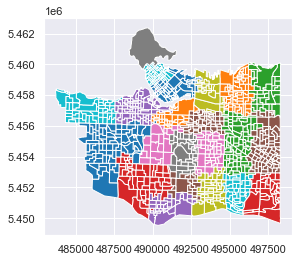

In [92]:
# Verify neighbourhood boundary estimates - not perfect, but looks close enough considering manual checking
geometry_sort.plot(column='neighbourhood')

In [93]:
geometry_sort

,geo_uid,geometry,quality_score,neighbourhood,population
533,59150953,"POLYGON ((486989.341 5453053.085, 487006.918 5...",0.466644,Dunbar-Southlands,21425
534,59150954,"POLYGON ((487395.796 5453151.361, 487507.475 5...",3.878854,Dunbar-Southlands,21425
175,59150506,"POLYGON ((489554.260 5451473.837, 489552.232 5...",5.193598,Kerrisdale,13975
567,59150987,"POLYGON ((488985.068 5451379.761, 488984.418 5...",4.610471,Kerrisdale,13975
172,59150503,"POLYGON ((489763.972 5450647.543, 489763.104 5...",6.176278,Kerrisdale,13975
...,...,...,...,...,...
696,59152942,"POLYGON ((498013.248 5450863.346, 498006.689 5...",3.489980,Killarney,29325
697,59152943,"POLYGON ((497543.208 5451431.111, 497574.071 5...",4.078259,Killarney,29325
586,59151219,"POLYGON ((496809.939 5451716.414, 496890.122 5...",2.659519,Killarney,29325
896,59153491,"POLYGON ((496921.982 5450444.672, 496852.341 5...",4.642653,Killarney,29325


## Using aggregated transit quality scores to identify neighbourhoods with best transit quality from 2010-2020

In [94]:
# Sort by best neighbourhoods first
neighbourhood_ranking = geometry_sort.groupby('neighbourhood').agg({'quality_score' : 'mean', 'population' : 'mean'}) \
                                        .sort_values(by='quality_score', ascending=False)

neighbourhood_ranking = neighbourhood_ranking.reset_index()

neighbourhood_ranking['population'] = neighbourhood_ranking['population'].astype('int')

neighbourhood_ranking

,neighbourhood,quality_score,population
0,Downtown,8.171198,62030
1,Fairview,7.548732,33620
2,Renfrew-Collingwood,7.480930,51530
3,West End,7.292999,47200
4,Strathcona,7.207733,12585
5,Mount Pleasant,7.156685,32955
6,Kensington-Cedar Cottage,7.084413,49325
7,Kitsilano,6.837748,43045
8,South Cambie,6.810111,7970
9,Marpole,6.490731,24460


In [95]:
# Output aggregated data as csv
neighbourhood_ranking[['neighbourhood', 'quality_score', 'population']].to_csv('output/neighbourhood_transit_quality.csv')

In [96]:
# Correlation between quality score and population?
# Use Pearson's coefficient (r) to test

r = neighbourhood_ranking.corr(method='pearson')

# 0.589292 r value between quality score & population
# r closer to -1 or 1: linearly related
# r closer to 0: little to no linear relationship
# r closer to 0.5? Maybe only slightly related?
r

,quality_score,population
quality_score,1.000000,0.589292
population,0.589292,1.000000


In [97]:
# Graph best fit line (linear regression) for comparison
# (See Exercise 2: Dog Rates)
fit = stats.linregress(neighbourhood_ranking['population'], neighbourhood_ranking['quality_score'])
neighbourhood_ranking['best_fit'] = neighbourhood_ranking['population']*fit.slope + fit.intercept

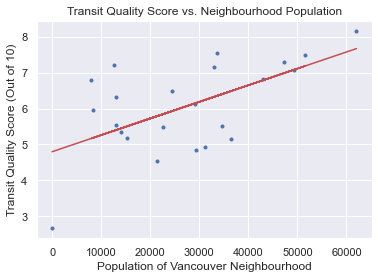

In [98]:
# Plot quality score vs population
plt.title('Transit Quality Score vs. Neighbourhood Population')
plt.xlabel('Population of Vancouver Neighbourhood')
plt.ylabel('Transit Quality Score (Out of 10)')

# Scatter plot
plt.plot(neighbourhood_ranking['population'], neighbourhood_ranking['quality_score'], 'b.')

# Best fit line
plt.plot(neighbourhood_ranking['population'], neighbourhood_ranking['best_fit'], 'r-')

## Visual comparisons of transit quality scores from 2010, 2015 & 2020

In [99]:
# Data range: 2010, 2015, 2020
# Extract relevant years into separate dataframes
transit_2010 = transit[transit['year'] == 2010]

# Merge with previous data on neighbourhood + population counts
transit_2010 = transit_2010.merge(geometry_sort[['geo_uid', 'neighbourhood', 'population']], on='geo_uid')

transit_2010

,geo_uid,city,year,quality_score,geometry,neighbourhood,population
0,59150307,Vancouver,2010,2.829753,"POLYGON ((498310.190 5459815.920, 498309.638 5...",Hastings-Sunrise,34575
1,59150308,Vancouver,2010,5.458190,"POLYGON ((498303.642 5459212.268, 498303.155 5...",Hastings-Sunrise,34575
2,59150309,Vancouver,2010,5.832826,"POLYGON ((497940.841 5459213.445, 497940.812 5...",Hastings-Sunrise,34575
3,59150310,Vancouver,2010,6.507989,"POLYGON ((498298.679 5458709.775, 498298.646 5...",Hastings-Sunrise,34575
4,59150311,Vancouver,2010,6.012171,"POLYGON ((497939.463 5458606.665, 498128.359 5...",Hastings-Sunrise,34575
...,...,...,...,...,...,...,...
987,59153996,Vancouver,2010,8.413423,"POLYGON ((491123.035 5459615.245, 491120.710 5...",West End,47200
988,59153997,Vancouver,2010,8.432154,"POLYGON ((491676.840 5459587.193, 491605.386 5...",Downtown,62030
989,59154000,Vancouver,2010,7.836553,"POLYGON ((492570.830 5458268.003, 492570.838 5...",Downtown,62030
990,59154001,Vancouver,2010,8.853501,"POLYGON ((492175.437 5458706.854, 492275.116 5...",Downtown,62030


In [100]:
transit_2010['quality_score'].mean()

6.196180441857331

In [101]:
transit_2010['quality_score'].median()

6.100901030556049

Text(0.5, 1.0, "2010 Map of Vancouver's Transit Quality")

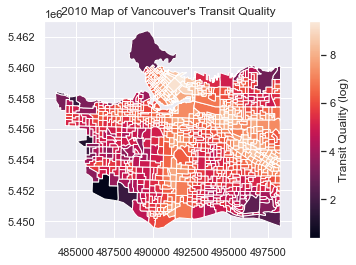

In [102]:
transit_2010.plot(column='quality_score', legend=True, legend_kwds={'label':'Transit Quality (log)'}) \
            .set_title('2010 Map of Vancouver\'s Transit Quality')

In [103]:
# Sort by best neighbourhoods first
neighbourhood_ranking_2010 = transit_2010.groupby('neighbourhood').agg({'quality_score' : 'mean', 'population' : 'mean'}) \
                                            .sort_values(by='quality_score', ascending=False)

neighbourhood_ranking_2010 = neighbourhood_ranking_2010.reset_index()

neighbourhood_ranking_2010['population'] = neighbourhood_ranking_2010['population'].astype('int')

neighbourhood_ranking_2010

,neighbourhood,quality_score,population
0,Downtown,8.135090,62030
1,Renfrew-Collingwood,7.455836,51530
2,West End,7.259072,47200
3,Strathcona,7.174798,12585
4,Kensington-Cedar Cottage,7.053699,49325
5,Fairview,6.798648,33620
6,Mount Pleasant,6.793386,32955
7,South Cambie,6.752856,7970
8,Marpole,6.450434,24460
9,Oakridge,6.291982,13030


In [104]:
transit_2015 = transit[transit['year'] == 2015]

# Merge with previous data on neighbourhood + population counts
transit_2015 = transit_2015.merge(geometry_sort[['geo_uid', 'neighbourhood', 'population']], on='geo_uid')

transit_2015

,geo_uid,city,year,quality_score,geometry,neighbourhood,population
0,59150307,Vancouver,2015,2.830236,"POLYGON ((498310.190 5459815.920, 498309.638 5...",Hastings-Sunrise,34575
1,59150308,Vancouver,2015,5.458358,"POLYGON ((498303.642 5459212.268, 498303.155 5...",Hastings-Sunrise,34575
2,59150309,Vancouver,2015,5.832944,"POLYGON ((497940.841 5459213.445, 497940.812 5...",Hastings-Sunrise,34575
3,59150310,Vancouver,2015,6.508120,"POLYGON ((498298.679 5458709.775, 498298.646 5...",Hastings-Sunrise,34575
4,59150311,Vancouver,2015,6.012399,"POLYGON ((497939.463 5458606.665, 498128.359 5...",Hastings-Sunrise,34575
...,...,...,...,...,...,...,...
987,59153996,Vancouver,2015,8.420976,"POLYGON ((491123.035 5459615.245, 491120.710 5...",West End,47200
988,59153997,Vancouver,2015,8.440356,"POLYGON ((491676.840 5459587.193, 491605.386 5...",Downtown,62030
989,59154000,Vancouver,2015,7.844865,"POLYGON ((492570.830 5458268.003, 492570.838 5...",Downtown,62030
990,59154001,Vancouver,2015,8.861268,"POLYGON ((492175.437 5458706.854, 492275.116 5...",Downtown,62030


In [105]:
transit_2015['quality_score'].mean()

6.370723077134794

In [106]:
transit_2015['quality_score'].median()

6.363215353497588

Text(0.5, 1.0, "2015 Map of Vancouver's Transit Quality")

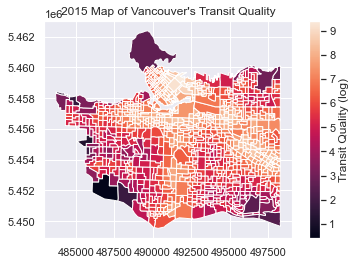

In [107]:
transit_2015.plot(column='quality_score', legend=True, legend_kwds={'label':'Transit Quality (log)'}) \
            .set_title('2015 Map of Vancouver\'s Transit Quality')

In [108]:
# Sort by best neighbourhoods first
neighbourhood_ranking_2015 = transit_2015.groupby('neighbourhood').agg({'quality_score' : 'mean', 'population' : 'mean'}) \
                                            .sort_values(by='quality_score', ascending=False)

neighbourhood_ranking_2015 = neighbourhood_ranking_2015.reset_index()

neighbourhood_ranking_2015['population'] = neighbourhood_ranking_2015['population'].astype('int')

neighbourhood_ranking_2015

,neighbourhood,quality_score,population
0,Downtown,8.145106,62030
1,Fairview,7.769879,33620
2,Renfrew-Collingwood,7.463665,51530
3,West End,7.264155,47200
4,Mount Pleasant,7.244886,32955
5,Strathcona,7.179793,12585
6,Kitsilano,7.093524,43045
7,Kensington-Cedar Cottage,7.072704,49325
8,South Cambie,6.800059,7970
9,Marpole,6.455972,24460


In [109]:
transit_2020 = transit[transit['year'] == 2020]

# Merge with previous data on neighbourhood + population counts
transit_2020 = transit_2020.merge(geometry_sort[['geo_uid', 'neighbourhood', 'population']], on='geo_uid')

transit_2020

,geo_uid,city,year,quality_score,geometry,neighbourhood,population
0,59150307,Vancouver,2020,2.850788,"POLYGON ((498310.190 5459815.920, 498309.638 5...",Hastings-Sunrise,34575
1,59150307,Vancouver,2020,2.915521,"POLYGON ((498310.190 5459815.920, 498309.638 5...",Hastings-Sunrise,34575
2,59150308,Vancouver,2020,5.500227,"POLYGON ((498303.642 5459212.268, 498303.155 5...",Hastings-Sunrise,34575
3,59150308,Vancouver,2020,5.625966,"POLYGON ((498303.642 5459212.268, 498303.155 5...",Hastings-Sunrise,34575
4,59150309,Vancouver,2020,5.879355,"POLYGON ((497940.841 5459213.445, 497940.812 5...",Hastings-Sunrise,34575
...,...,...,...,...,...,...,...
1979,59154000,Vancouver,2020,7.909729,"POLYGON ((492570.830 5458268.003, 492570.838 5...",Downtown,62030
1980,59154001,Vancouver,2020,8.882350,"POLYGON ((492175.437 5458706.854, 492275.116 5...",Downtown,62030
1981,59154001,Vancouver,2020,8.931254,"POLYGON ((492175.437 5458706.854, 492275.116 5...",Downtown,62030
1982,59154002,Vancouver,2020,8.645573,"POLYGON ((492742.239 5458227.186, 492740.089 5...",Downtown,62030


In [110]:
transit_2020['quality_score'].mean()

6.4321927753930295

In [111]:
transit_2020['quality_score'].median()

6.437642790576171

Text(0.5, 1.0, "2020 Map of Vancouver's Transit Quality")

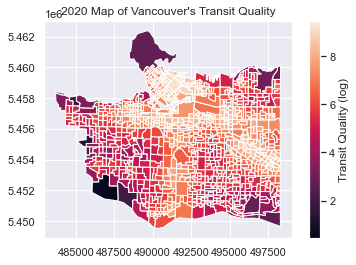

In [112]:
transit_2020.plot(column='quality_score', legend=True, legend_kwds={'label':'Transit Quality (log)'}) \
            .set_title('2020 Map of Vancouver\'s Transit Quality')

In [113]:
# Sort by best neighbourhoods first
neighbourhood_ranking_2020 = transit_2020.groupby('neighbourhood').agg({'quality_score' : 'mean', 'population' : 'mean'}) \
                                            .sort_values(by='quality_score', ascending=False)

neighbourhood_ranking_2020 = neighbourhood_ranking_2020.reset_index()

neighbourhood_ranking_2020['population'] = neighbourhood_ranking_2020['population'].astype('int')

neighbourhood_ranking_2020

,neighbourhood,quality_score,population
0,Downtown,8.202297,62030
1,Fairview,7.813202,33620
2,Renfrew-Collingwood,7.502110,51530
3,West End,7.324385,47200
4,Mount Pleasant,7.294235,32955
5,Strathcona,7.238171,12585
6,Kitsilano,7.148862,43045
7,Kensington-Cedar Cottage,7.105624,49325
8,South Cambie,6.843764,7970
9,Marpole,6.528260,24460
